# Machine Learning - Arvore de Decisão - Exercícios

**1) Baseado em seus conhecimentos sobre Arvores de Decisão explique suas vantagens e desvantagens.**

*As vantagens da árvore de decisão são: modelo de fácil entendimento resultando em uma exploração de dados visual para identificar as features mais relevantes, suporta dados de tipos distintos como variaveis numericas e categoricas e por ser um modelo baseado em indução de regras para dividir os dados se torna mais robusto contra os outliers. A maior desvantagem é que o modelo de árvore de decisão é mais propenso a sofrer overfitting devido à sua facilidade em se ajustar aos dados de treinamento.*

**2) Explique de forma teórica:<br>**
* 2.1 - Como são geradas as árvores de decisão?
* 2.2 - Quais são as medidas utilizadas para calcular a impureza dos dados?
* 2.3 - Explique como funciona as estratégias para evitar Overfitting baseado em pre-poda e pós-poda.

* 2.1: *As ávores são formadas por nós, ramos e folhas que nascem à partir da indução de regras baseado nos pontos de decisão (nós) para se classificar novas amostras em um cenário de classificação. A construção da árvore é feita a partir da seleção dos melhores atributos que dividem os dados à partir do indicador de impureza. Esse processo é chamado de seletividade.*<br>
* 2.2: *Indice Gini, ganho de informação e redução de variância.*<br>
* 2.3: *Na etapa de pré-poda são verificados os índices de ganho de informação dos atributos durante a etapa de construção da árvore para definir o threshold do nível de folha limitando o crescimento da árvore. Na etapa da pós-poda alguns ramos são selecionados e podados, após isso é recalculada a acurácia do modelo para verificar se o modelo melhorou ou piorou.*

**3) Em comparação com modelos lineares, quando devemos usar modelos baseados em arvores de decisão?**

*Utilizamos modelos baseados em árvore de decisão quando temos um relacionamento fraco entre as variáveis dependente com a variável dependente, permitindo a construção de um modelo mais complexo. Além disso também é utilizado quando temos que compreender a influencia dos atributos no resultados final.*

**4) Explique o funcionamento do parâmetro max_depth.**

*O parâmetro max_depth limita a quantidade de níveis de crescimento da árvore, é a profundidade máxima que a árvore pode alcançar.*

**5) Explique o funcionamento do parâmetro min_samples_split.**
* Lembre-se da imagem abaixo

*O parâmetro min_samples_split define a quantidade mínima de amostras necessárias para a divisão de um nó. Se o valor for menor do que o definido, o nó de decisão se forna um nó folha.*

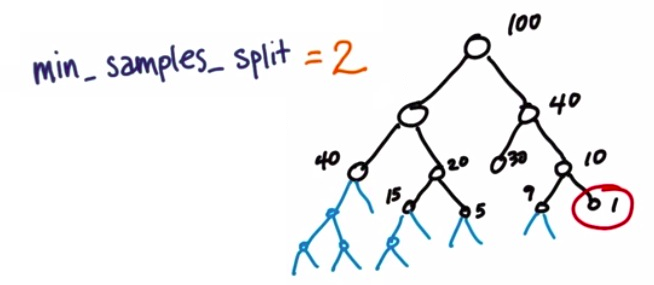

In [1]:
from IPython.display import Image
Image(filename ="imagens/min-samples-split.png", width=500, height=500)

**6) Utilizando o dataset datasets/bank-numeric.csv faça:**
* 6.1 - Carregue a base de dados e separe os dados e as classes em variáveis distintas.
* 6.2 - Treine um modelo baseado em arvore de decisão com seus parametros padrão.
* 6.3 - Utilizando o código abaixo, faça as alterações necessárias para renderizar de forma gráfica a arvore utilizando o modelo treinado no item anterior (6.2).

Importando as bibliotecas

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

## Visualização da árvore
from sklearn.tree import export_graphviz
import pydot
import graphviz
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Carregando os dados

In [6]:
df = pd.read_csv('datasets\\bank-numeric.txt')
df.head()

age  balance  duration  campaign  previous  default_cat  housing_cat  \
0   59     2343      1042         1         0            0            1   
1   56       45      1467         1         0            0            0   
2   41     1270      1389         1         0            0            1   
3   55     2476       579         1         0            0            1   
4   54      184       673         2         0            0            0   

   loan_cat  recent_pdays  deposit_cat  ...  marital_divorced  \
0         0        0.0001            1  ...                 0   
1         0        0.0001            1  ...                 0   
2         0        0.0001            1  ...                 0   
3         0        0.0001            1  ...                 0   
4         0        0.0001            1  ...                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    1   
1                1               0                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    1   
4                1               0                  0                    0   

   education_tertiary  education_unknown  poutcome_failure  poutcome_success  \
0                   0                  0                 0                 0   
1                   0                  0                 0                 0   
2                   0                  0                 0                 0   
3                   0                  0                 0                 0   
4                   1                  0                 0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 27 columns]

In [7]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 27 columns):
age                    11162 non-null int64
balance                11162 non-null int64
duration               11162 non-null int64
campaign               11162 non-null int64
previous               11162 non-null int64
default_cat            11162 non-null int64
housing_cat            11162 non-null int64
loan_cat               11162 non-null int64
recent_pdays           11162 non-null float64
deposit_cat            11162 non-null int64
job_blue-collar        11162 non-null int64
job_entrepreneur       11162 non-null int64
job_other              11162 non-null int64
job_pink-collar        11162 non-null int64
job_self-employed      11162 non-null int64
job_technician         11162 non-null int64
job_white-collar       11162 non-null int64
marital_divorced       11162 non-null int64
marital_married        11162 non-null int64
marital_single         11162 non-null int64
education

In [9]:
# Verificando valores nulos
df.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
previous               0
default_cat            0
housing_cat            0
loan_cat               0
recent_pdays           0
deposit_cat            0
job_blue-collar        0
job_entrepreneur       0
job_other              0
job_pink-collar        0
job_self-employed      0
job_technician         0
job_white-collar       0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
poutcome_failure       0
poutcome_success       0
poutcome_unknown       0
dtype: int64

Divisão dos dados em data e target

In [43]:
df['deposit_cat'] = df['deposit_cat'].astype(str)

In [44]:
data, target = df.drop(['deposit_cat'], axis=1), df['deposit_cat']
data.shape, target.shape

((11162, 26), (11162,))

In [45]:
data_names = data.columns
target_names = target.unique()

In [46]:
type(target_names)

numpy.ndarray

Divisão dos dados em treino e teste

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
print('='*45)
print('Dimensões dos dataframes de treino e teste')
print('='*45)
print('------------TREINO----------TESTE------------')
print('----X:    {}      {}'.format(X_train.shape, X_test.shape))
print('----y:    {}         {}'.format(y_train.shape, y_test.shape))
print('='*45)

Dimensões dos dataframes de treino e teste
------------TREINO----------TESTE------------
----X:    (7813, 26)      (3349, 26)
----y:    (7813,)         (3349,)


Instanciando o classificador baseado de árvore de decisão

In [65]:
clf = tree.DecisionTreeClassifier()

In [66]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

*** Visualizando de forma gráfica a arvore gerada***

In [67]:
# extra step to allow graphviz to be found 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/edubr/Anaconda3/envs/data-science/Library/bin/graphviz/'

In [68]:
dot_data = tree.export_graphviz(
         clf, 
         out_file=None,
         feature_names=data_names,
         class_names=target_names,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

* 6.4 - Observou que a arvore ficou muito grande ? Explique como é possível reduzir o tamanho da árvore. Quais os parametros que influenciam diretamente na profundidade da arvore?
* 6.5 - Baseado nisso, treine novamente o modelo, dessa vez, aumentando o parâmetro max_depth e renderize novamente a arvore de forma gráfica. 

* 6.4: A árvore ficou extremamente grande! Para reduzir o tamanho da mesma poderíamos limitar a profundidade máxima da árvore (max_depth), aumentar o valor mínimo de amostras considerados para o nó de divisão (min_samples_split) e reduzir o número de folhas (min_samples_leaf) diminuindo a complexidade do modelo.

In [78]:
clf_2 = tree.DecisionTreeClassifier(max_depth = 5)
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

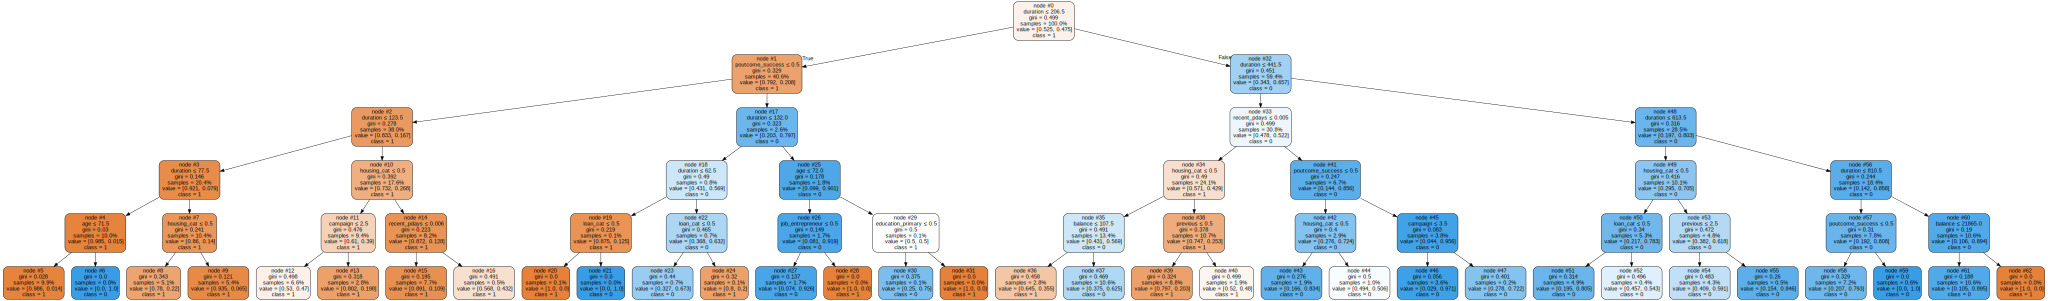

In [79]:
dot_data = tree.export_graphviz(
         clf_2, 
         out_file=None,
         feature_names=data_names,
         class_names=target_names,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

**7) Baseado no conhecimento aprendido sobre o parâmetro min_samples_split e seu impacto na complexidade do modelo, utilize a função abaixo e plote as fronteiras para os valores de min_samples_split iguais a 1, 5 e 15. **

* Utilize o modelo treinado anteriormente com a base de dados bank-numeric.
* Faça os ajustes necessários na função como alteração dos valores das váriáveis X e y.
* Não esqueça de importar a biblioteca ml_extend conforme aprendemos em aula.

In [134]:
X_train.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'default_cat',
       'housing_cat', 'loan_cat', 'recent_pdays', 'job_blue-collar',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [165]:
def visualize_fronteiras(msamples_split, feature1, feature2):
    X = X_train[ [feature1, feature2] ].values
    y = y_train.astype(int).values

    clf = tree.DecisionTreeClassifier(min_samples_split=msamples_split)
    clf_tree = clf.fit(X, y)
    
    print(clf_tree.feature_importances_)

    plt.figure(figsize=(8,5))
    plot_decision_regions(X, y, clf=clf_tree, legend=2)

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Decision Tree on Iris')
    plt.show()

[0.82292512 0.17707488]


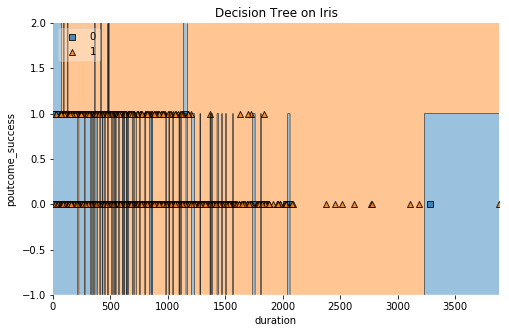

In [166]:
visualize_fronteiras(5, 'duration', 'poutcome_success')

**8) Através do conhecimento aprendido em aula, compare a performance dos modelos de arvore de decisão variando o parametro max_depth em relação a performance utilizando como validação os dados de treinamento e teste. Para isso siga os passos dos itens abaixo. **

* 8.1 - Carregue a base de dados bank-numeric.
* 8.2 - Divida os dados em em treino e teste com o percentual de 30% para teste e 70% para treino.
* 8.3 - Utilize a função compara_modelos() conforme o código abaixo.
* 8.4 - Faça as alterações necessárias para utilizar os dados divididos anteriormente.
* 8.5 - Explique porque aumentamos o valor de max_depth tendemos a errar mais para o conjunto de teste e acertar mais no conjunto de treinamento.

In [167]:
def compara_modelos(maxdepth):
    if maxdepth == 0:
        dt = tree.DecisionTreeClassifier(random_state=1)
    else:   
        dt = tree.DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    dt.fit(X_train, y_train)
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    return train_score,test_score

In [168]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos(2))))
print('{:1}         {} '.format(3,str(compara_modelos(3))))
print('{:1}         {} '.format(4,str(compara_modelos(4))))
print('{:1}         {} '.format(10,str(compara_modelos(10))))
print('{:1}         {} '.format(15,str(compara_modelos(15))))
print('{:1}         {} '.format('Full',str(compara_modelos(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.7277614232689108, 0.7291728874290833) 
3         (0.762063227953411, 0.7781427291728874) 
4         (0.7812619992320492, 0.7951627351448194) 
10         (0.8667605273262511, 0.7903851896088384) 
15         (0.9397158581850762, 0.7590325470289638) 
Full         (1.0, 0.7384293819050463) 


*Aumentando o parâmetro max_depth fazemos com que o modelo fique mais ajustado aos nossos dados de treinamento, aumentando a complexidade e diminuindo a capacidade de generalização do modelo (overfitting).*